In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from gameworlds.hex_world import HexState, HexAction, is_final_move, neighbors
import numpy as np
from config import  Config
import random
from rl import ReinforcementLearningAgent
import time
from IPython.display import clear_output


In [4]:
flat = np.zeros(Config.k**2 + 1)
flat[0] = 1


for _ in range(2000):
    state = HexState.from_array(flat)
    
    while not state.is_final_state:

        move = random.choice(state.get_legal_actions())

        state = state.do_action(move)
        # state.plot(labels=True)
        # time.sleep(0.5)
        # clear_output(wait=True)
    # print(f"Player {-state.player} won!")
    

In [5]:
rlAgent = ReinforcementLearningAgent()

2022-03-22 15:51:20.004429: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
rlAgent.train()

Episode 0
Saved network weights
1/1 [==============================] - 0s 425ms/step - loss: 3.3862 - accuracy: 0.0000e+00
Episode 1
2/2 [==============================] - 0s 4ms/step - loss: 3.3877 - accuracy: 0.0000e+00
Episode 2
3/3 [==============================] - 0s 2ms/step - loss: 3.3920 - accuracy: 0.0299
Episode 3
3/3 [==============================] - 0s 2ms/step - loss: 3.3721 - accuracy: 0.0220
Episode 4
4/4 [==============================] - 0s 2ms/step - loss: 3.3324 - accuracy: 0.0500
Episode 5
4/4 [==============================] - 0s 1ms/step - loss: 3.2973 - accuracy: 0.1200
Episode 6
4/4 [==============================] - 0s 2ms/step - loss: 3.2867 - accuracy: 0.1000
Episode 7
4/4 [==============================] - 0s 1ms/step - loss: 3.2680 - accuracy: 0.0600
Episode 8
4/4 [==============================] - 0s 2ms/step - loss: 3.2424 - accuracy: 0.1100
Episode 9
4/4 [==============================] - 0s 1ms/step - loss: 3.2471 - accuracy: 0.0800
Episode 10
4/4 [==

KeyboardInterrupt: 

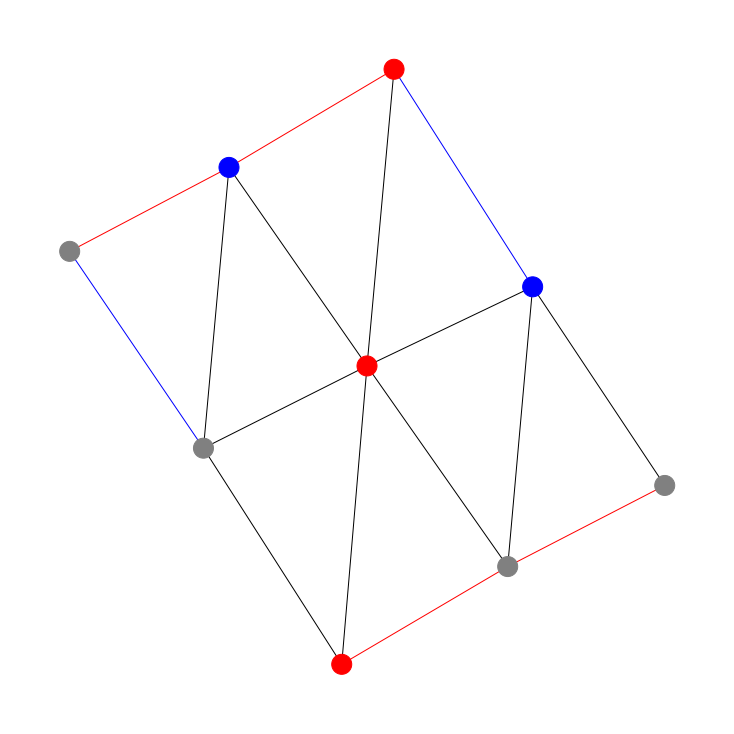

In [46]:
world = HexState.empty_board()
while not world.is_final_state:

    action = rlAgent.anet.select_action(world)
    world = world.do_action(action)
    time.sleep(3.0)
    world.plot()
    
